In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot
import os
import ROOT
import pylhe
import heapq
import matplotlib.pyplot as plt
import math

Welcome to JupyROOT 6.20/04


In [2]:
# Invariant mass photon
def in_mass1(pT1, phi1, eta1, m1, pT2, phi2, eta2, m2):
    # Calculate the components for the first particle
    Px1 = pT1 * np.cos(phi1)
    Py1 = pT1 * np.sin(phi1)
    Pz1 = pT1 * np.sinh(eta1)
    E1 = m1
    
    # Calculate the components for the second particle
    Px2 = pT2 * np.cos(phi2)
    Py2 = pT2 * np.sin(phi2)
    Pz2 = pT2 * np.sinh(eta2)
    E2 = m2
    
    # Sum the components
    Px_total = Px1 + Px2
    Py_total = Py1 + Py2
    Pz_total = Pz1 + Pz2
    E_total = E1 + E2
    
    # Calculate the invariant mass
    M = E_total**2 - (Px_total**2 + Py_total**2 + Pz_total**2)
    if M < 0:
        return 0.0  # In case of numerical precision issues
    return np.sqrt(M)


# Invariant mass bl


def in_Mbl(pT1, phi1, eta1, m1, pT2, phi2, eta2, m2):
    # Calculate the components for the first particle
    Px1 = pT1 * np.cos(phi1)
    Py1 = pT1 * np.sin(phi1)
    Pz1 = pT1 * np.sinh(eta1)
    E1 = np.sqrt(m1**2 + Px1**2 + Py1**2 + Pz1**2)
    
    # Calculate the components for the second particle
    Px2 = pT2 * np.cos(phi2)
    Py2 = pT2 * np.sin(phi2)
    Pz2 = pT2 * np.sinh(eta2)
    E2 = np.sqrt(m2**2 + Px2**2 + Py2**2 + Pz2**2)
    
    # Sum the components
    Px_total = Px1 + Px2
    Py_total = Py1 + Py2
    Pz_total = Pz1 + Pz2
    E_total = E1 + E2
    
    # Calculate the invariant mass
    M = E_total**2 - (Px_total**2 + Py_total**2 + Pz_total**2)
    if M < 0:
        return 0.0  # In case of numerical precision issues
    return np.sqrt(M)








def dR(phi1,phi2,eta1,eta2):
    return np.sqrt((phi1-phi2)**2+(eta1-eta2)**2)




Me = 0.000511
Mm = 0.10566
Mb = 4.7

In [3]:
data=uproot.open("/docker_workplace/ALP_Detec/BG2/Events/run_01/tag_2_delphes_events.root")["Delphes"]

# Create DataFrames for photons, electrons, and muons
df_jet = pd.DataFrame({
    "Pj": pd.DataFrame(data["Jet.PT"].array())[0],
    "Etaj": pd.DataFrame(data["Jet.Eta"].array())[0],
    "Phij": pd.DataFrame(data["Jet.Phi"].array())[0]
    
})

df_photon = pd.DataFrame({
    "Pa1": pd.DataFrame(data["Photon.PT"].array())[0],
    "Etaa1": pd.DataFrame(data["Photon.Eta"].array())[0],
    "Phia1": pd.DataFrame(data["Photon.Phi"].array())[0],
    "Ea1": pd.DataFrame(data["Photon.E"].array())[0],
    "Pa2": pd.DataFrame(data["Photon.PT"].array())[1],
    "Etaa2": pd.DataFrame(data["Photon.Eta"].array())[1],
    "Phia2": pd.DataFrame(data["Photon.Phi"].array())[1],
    "Ea2": pd.DataFrame(data["Photon.E"].array())[1],
})


df_e = pd.DataFrame({
    "Pl": pd.DataFrame(data["Electron.PT"].array())[0],
    "Etal": pd.DataFrame(data["Electron.Eta"].array())[0],
    "Phil": pd.DataFrame(data["Electron.Phi"].array())[0]
})

df_m = pd.DataFrame({
    "Pl": pd.DataFrame(data["Muon.PT"].array())[0],
    "Etal": pd.DataFrame(data["Muon.Eta"].array())[0],
    "Phil": pd.DataFrame(data["Muon.Phi"].array())[0]
})



df_c = df_e.fillna(df_m)


pt_1 = data["Jet.PT"].array()
eta_1 = data["Jet.Eta"].array()
phi_1 = data["Jet.Phi"].array()
flavor_1 = data["Jet.Flavor"].array()
btag_1 = data["Jet.BTag"].array()


b_jets = btag_1 == 1
pt_b = pt_1[b_jets]
eta_b = eta_1[b_jets]
phi_b = phi_1[b_jets]

Pt_b = [tup[0] if len(tup) > 0 else None for tup in pt_b]
Eta_b =[tup[0] if len(tup) > 0 else None for tup in eta_b]
Phi_b= [tup[0] if len(tup) > 0 else None for tup in phi_b]


df_b = pd.DataFrame({
    
    "Pb": pd.DataFrame(data["Jet.PT"].array())[1],
    "Etab": pd.DataFrame(data["Jet.Eta"].array())[1],
    "Phib": pd.DataFrame(data["Jet.Phi"].array())[1]
    
})


"""df_b = pd.DataFrame({
    "Pb": Pt_b,
    "Etab": Eta_b,
    "Phib": Phi_b
})"""


'df_b = pd.DataFrame({\n    "Pb": Pt_b,\n    "Etab": Eta_b,\n    "Phib": Phi_b\n})'

In [4]:
len(df_jet)

5000

In [5]:
# Initialize empty arrays to store individual elements
Pb_array = []
Etab_array = []
Phib_array = []

# Iterate through each row in df_b and extract values into arrays
for index, row in df_b.iterrows():
    Pb_array.append(row['Pb'])
    Etab_array.append(row['Etab'])
    Phib_array.append(row['Phib'])

# Convert lists to numpy arrays if needed
Pb_array = np.array(Pb_array)
Etab_array = np.array(Etab_array)
Phib_array = np.array(Phib_array)

In [6]:
Pl_array = []
Etal_array = []
Phil_array = []

# Iterate through each row in df_c and extract values into arrays
for index, row in df_c.iterrows():
    Pl_array.append(row['Pl'])
    Etal_array.append(row['Etal'])
    Phil_array.append(row['Phil'])

# Convert lists to numpy arrays if needed
Pl_array = np.array(Pl_array)
Etal_array = np.array(Etal_array)
Phil_array = np.array(Phil_array)

In [7]:
Mbl_e=[]
for i in range(len(Pl_array)):
    Mbl_e.append(in_Mbl(Pb_array[i], Phib_array[i], Etab_array[i], Mb, Pl_array[i], Phil_array[i], Etal_array[i], Me))

/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


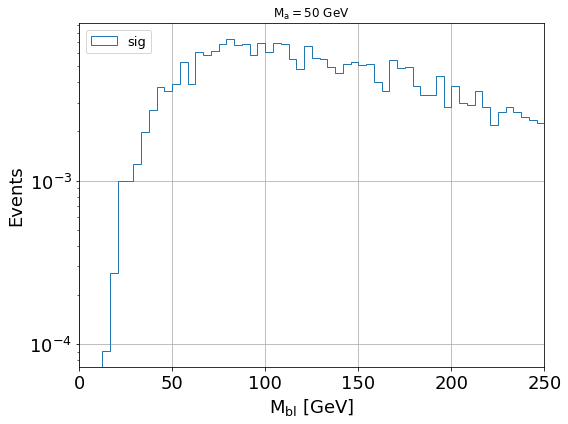

In [8]:
bins = 60
fs=18 # front size
tagsize = 18 # label tag size
plt.figure(figsize=(8,6)) # plotsize
x1, x2 = 0, 250 # x region

#1 subplot
plt.hist(Mbl_e, bins=bins, histtype='step',density=True,range=[x1, x2], label='sig')

plt.legend(fontsize=13,loc='upper left') # plot label tag
plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$\\rm M_{bl}~[GeV]$' , fontsize=fs)  # plot x-axis label
plt.ylabel("Events", fontsize=fs)  # plot y-axis label
plt.xticks(fontsize=fs)   # set x-ticks size
plt.yticks(fontsize=fs)   # set y-ticks size
plt.xlim(0,250)
#plt.ylim(0,0.45)
plt.title("$\\rm M_{a}=50~GeV$")
plt.tight_layout()

plt.grid()

In [9]:
Pa1_array = df_photon["Pa1"].to_numpy()
Etaa1_array = df_photon["Etaa1"].to_numpy()
Phia1_array = df_photon["Phia1"].to_numpy()
Ea1_array = df_photon["Ea1"].to_numpy()
Pa2_array = df_photon["Pa2"].to_numpy()
Etaa2_array = df_photon["Etaa2"].to_numpy()
Phia2_array = df_photon["Phia2"].to_numpy()
Ea2_array = df_photon["Ea2"].to_numpy()

In [10]:
Maa_a = []

# Iterate through the length of the photon arrays and compute invariant masses
for i in range(len(Pa1_array)):
    Maa_a.append(in_mass1(
        Pa1_array[i], Phia1_array[i], Etaa1_array[i], Ea1_array[i],  # First photon
        Pa2_array[i], Phia2_array[i], Etaa2_array[i], Ea2_array[i]   # Second photon
    ))

/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


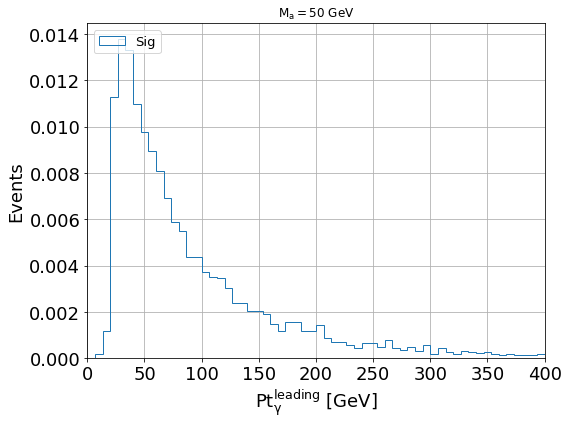

In [11]:
bins = 60
fs=18 # front size
tagsize = 18 # label tag size
plt.figure(figsize=(8,6)) # plotsize
x1, x2 = 0, 400 # x region

#1 subplot
plt.hist(df_photon["Pa1"], bins=bins, histtype='step',density=True,range=[x1, x2], label='Sig')
plt.legend(fontsize=13,loc='upper left') # plot label tag
#plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$\\rm Pt_\\gamma^{leading}~[GeV]$' , fontsize=fs)  # plot x-axis label
plt.ylabel("Events", fontsize=fs)  # plot y-axis label
plt.xticks(fontsize=fs)   # set x-ticks size
plt.yticks(fontsize=fs)   # set y-ticks size
plt.xlim(0,400)
#plt.ylim(0,0.45)
plt.title("$\\rm M_{a}=50~GeV$")
plt.tight_layout()

plt.grid()

In [12]:
dRbl=[]
for i in range(len(Pa1_array)):
    dRbl.append(dR(Phib_array[i],Phil_array[i],Etab_array[i],Etal_array[i]))
    
dRbj=[]
for i in range(len(Pa1_array)):
    dRbj.append(dR(Phib_array[i],np.array(df_jet["Pj"])[i], Etab_array[i], np.array(df_jet["Etaj"])[i]))
    
dRba=[]
for i in range(len(Pa1_array)):
    dRba.append(dR(Phib_array[i], Phia1_array[i], Etab_array[i], Etaa1_array[i]))
    
dRla=[]
for i in range(len(Pa1_array)):
    dRla.append(dR(Phil_array[i], Phia1_array[i], Etal_array[i], Etaa1_array[i]))
    

/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


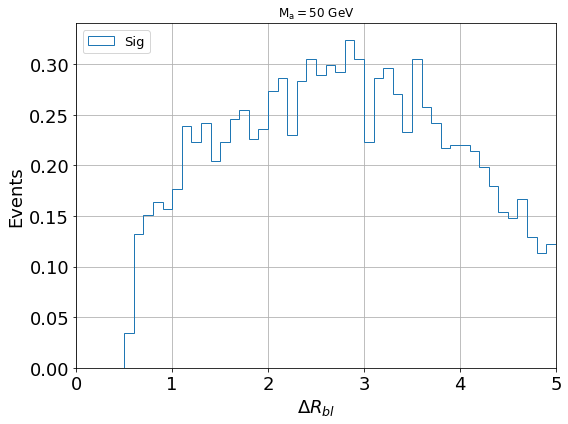

In [13]:
bins = 50
fs=18 # front size
tagsize = 18 # label tag size
plt.figure(figsize=(8,6)) # plotsize
x1, x2 = 0,5 # x region

#1 subplot
plt.hist(dRbl, bins=bins, histtype='step',density=True,range=[x1, x2], label='Sig')
plt.legend(fontsize=13,loc='upper left') # plot label tag
#plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$\\Delta R_{bl}$' , fontsize=fs)  # plot x-axis label
plt.ylabel("Events", fontsize=fs)  # plot y-axis label
plt.xticks(fontsize=fs)   # set x-ticks size
plt.yticks(fontsize=fs)   # set y-ticks size
plt.xlim(0,5)
#plt.ylim(0,0.45)
plt.title("$\\rm M_{a}=50~GeV$")
plt.tight_layout()

plt.grid()

/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


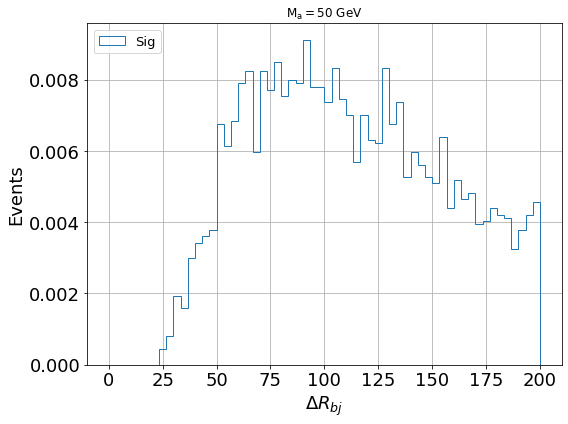

In [14]:
bins = 60
fs=18 # front size
tagsize = 18 # label tag size
plt.figure(figsize=(8,6)) # plotsize
x1, x2 = 0,200 # x region

#1 subplot
plt.hist(dRbj, bins=bins, histtype='step',density=True,range=[x1, x2], label='Sig')
plt.legend(fontsize=13,loc='upper left') # plot label tag
#plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$\\Delta R_{bj}$' , fontsize=fs)  # plot x-axis label
plt.ylabel("Events", fontsize=fs)  # plot y-axis label
plt.xticks(fontsize=fs)   # set x-ticks size
plt.yticks(fontsize=fs)   # set y-ticks size
#plt.xlim(0,5)
#plt.ylim(0,0.45)
plt.title("$\\rm M_{a}=50~GeV$")
plt.tight_layout()

plt.grid()

/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


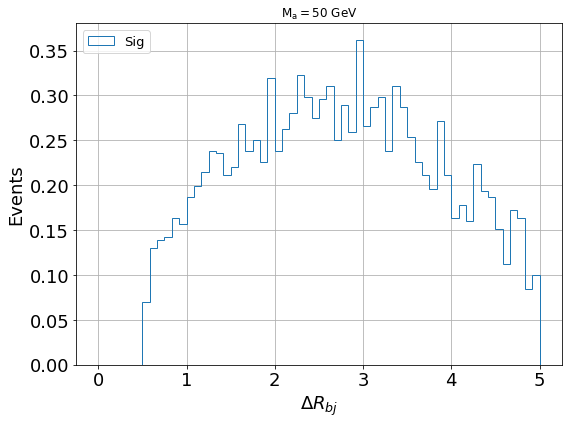

In [15]:
bins = 60
fs=18 # front size
tagsize = 18 # label tag size
plt.figure(figsize=(8,6)) # plotsize
x1, x2 = 0,5 # x region

#1 subplot
plt.hist(dRba, bins=bins, histtype='step',density=True,range=[x1, x2], label='Sig')
plt.legend(fontsize=13,loc='upper left') # plot label tag
#plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$\\Delta R_{bj}$' , fontsize=fs)  # plot x-axis label
plt.ylabel("Events", fontsize=fs)  # plot y-axis label
plt.xticks(fontsize=fs)   # set x-ticks size
plt.yticks(fontsize=fs)   # set y-ticks size
#plt.xlim(0,5)
#plt.ylim(0,0.45)
plt.title("$\\rm M_{a}=50~GeV$")
plt.tight_layout()

plt.grid()

/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


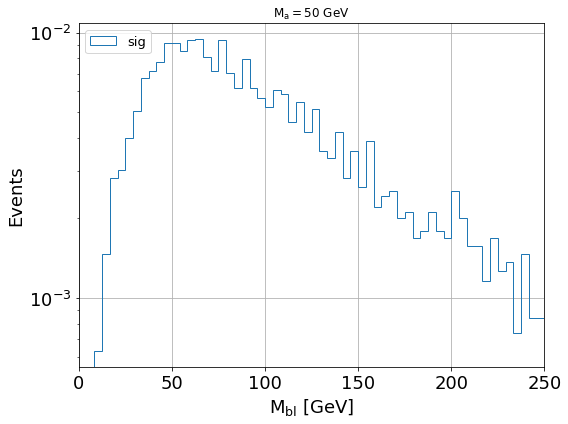

In [16]:
bins = 60
fs=18 # front size
tagsize = 18 # label tag size
plt.figure(figsize=(8,6)) # plotsize
x1, x2 = 0, 250 # x region

#1 subplot
plt.hist(Maa_a, bins=bins, histtype='step',density=True,range=[x1, x2], label='sig')

plt.legend(fontsize=13,loc='upper left') # plot label tag
plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$\\rm M_{bl}~[GeV]$' , fontsize=fs)  # plot x-axis label
plt.ylabel("Events", fontsize=fs)  # plot y-axis label
plt.xticks(fontsize=fs)   # set x-ticks size
plt.yticks(fontsize=fs)   # set y-ticks size
plt.xlim(0,250)
#plt.ylim(0,0.45)
plt.title("$\\rm M_{a}=50~GeV$")
plt.tight_layout()

plt.grid()

/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


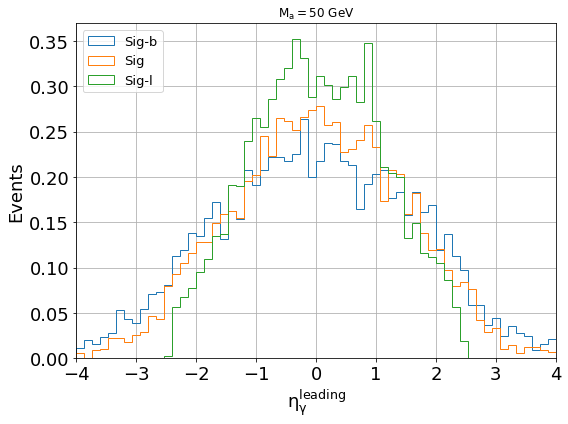

In [17]:
bins = 60
fs=18 # front size
tagsize = 18 # label tag size
plt.figure(figsize=(8,6)) # plotsize
x1, x2 = -4, 4 # x region

#1 subplot
#plt.hist(df_photon["Etaa1"], bins=bins, histtype='step',density=True,range=[x1, x2], label='Sig-ph')
plt.hist(df_b["Etab"], bins=bins, histtype='step',density=True,range=[x1, x2], label='Sig-b')
plt.hist(df_jet["Etaj"], bins=bins, histtype='step',density=True,range=[x1, x2], label='Sig')
plt.hist(Etal_array, bins=bins, histtype='step',density=True,range=[x1, x2], label='Sig-l')



plt.legend(fontsize=13,loc='upper left') # plot label tag
#plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$\\rm \\eta_\\gamma^{leading}$' , fontsize=fs)  # plot x-axis label
plt.ylabel("Events", fontsize=fs)  # plot y-axis label
plt.xticks(fontsize=fs)   # set x-ticks size
plt.yticks(fontsize=fs)   # set y-ticks size
plt.xlim(-4,4)
#plt.ylim(0,0.45)
plt.title("$\\rm M_{a}=50~GeV$")
plt.tight_layout()

plt.grid()

/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


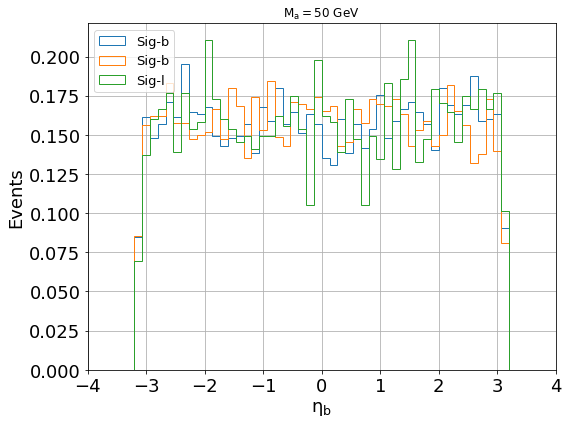

In [18]:
bins = 60
fs=18 # front size
tagsize = 18 # label tag size
plt.figure(figsize=(8,6)) # plotsize
x1, x2 = -4, 4 # x region

#1 subplot
plt.hist(df_b["Phib"], bins=bins, histtype='step',density=True,range=[x1, x2], label='Sig-b')
plt.hist(df_jet["Phij"], bins=bins, histtype='step',density=True,range=[x1, x2], label='Sig-b')
plt.hist(Phil_array, bins=bins, histtype='step',density=True,range=[x1, x2], label='Sig-l')

plt.legend(fontsize=13,loc='upper left') # plot label tag
#plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$\\rm \\eta_b}$' , fontsize=fs)  # plot x-axis label
plt.ylabel("Events", fontsize=fs)  # plot y-axis label
plt.xticks(fontsize=fs)   # set x-ticks size
plt.yticks(fontsize=fs)   # set y-ticks size
plt.xlim(-4,4)
#plt.ylim(0,0.45)
plt.title("$\\rm M_{a}=50~GeV$")
plt.tight_layout()

plt.grid()

/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


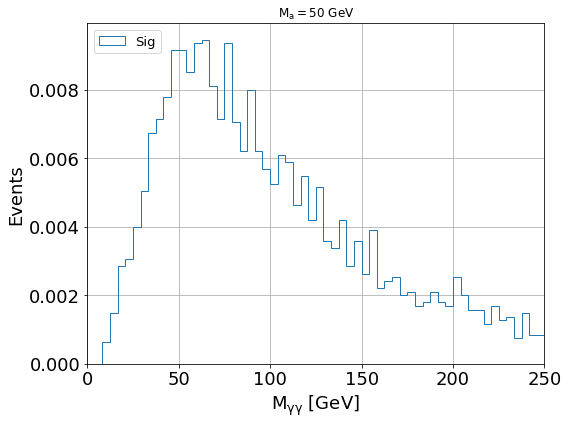

In [19]:
bins = 60
fs=18 # front size
tagsize = 18 # label tag size
plt.figure(figsize=(8,6)) # plotsize
x1, x2 = 0,250 # x region

#1 subplot
plt.hist(Maa_a, bins=bins, histtype='step',density=True,range=[x1, x2], label='Sig')
plt.legend(fontsize=13,loc='upper left') # plot label tag
#plt.yscale('log') 
#plt.xscale('log')
plt.xlabel('$\\rm M_{\\gamma\\gamma}~[GeV]$' , fontsize=fs)  # plot x-axis label
plt.ylabel("Events", fontsize=fs)  # plot y-axis label
plt.xticks(fontsize=fs)   # set x-ticks size
plt.yticks(fontsize=fs)   # set y-ticks size
plt.xlim(0,250)
#plt.ylim(0,0.45)
plt.title("$\\rm M_{a}=50~GeV$")
plt.tight_layout()

plt.grid()

In [20]:
BG_2=pd.DataFrame({  
    
    "Pj": pd.DataFrame(data["Jet.PT"].array())[0],
    "Etaj": pd.DataFrame(data["Jet.Eta"].array())[0],
    "Phij": pd.DataFrame(data["Jet.Phi"].array())[0],
    "Pa1": pd.DataFrame(data["Photon.PT"].array())[0],
    "Etaa1": pd.DataFrame(data["Photon.Eta"].array())[0],
    "Phia1": pd.DataFrame(data["Photon.Phi"].array())[0],
    "Pl":Pl_array,
    "Etal":Etal_array,
    "Phil":Phil_array,
    "Pb":df_b["Pb"],
    "Etab":df_b["Etab"],
    "Phib":df_b["Phib"],
    "Mbl":Mbl_e,
    "Maa":Maa_a,
    "DRbl":dRbl,
    "DRba":dRba,
    "DRbj":dRbj,
    "DRla":dRla })
    
    
    
    
    
  



In [21]:
BG_2

,Pj,Etaj,Phij,Pa1,Etaa1,Phia1,Pl,Etal,Phil,Pb,Etab,Phib,Mbl,Maa,DRbl,DRba,DRbj,DRla
0,50.062954,-2.042015,2.029564,68.080696,1.391315,0.398145,53.381069,1.683079,-2.284713,38.497223,0.600497,1.259536,103.141938,NaN,3.705898,1.169354,48.874907,2.698676
1,235.636414,-0.588211,-0.665452,110.044373,0.170553,-2.571864,76.562752,-0.724046,2.276778,62.707069,0.702828,-0.082298,167.363535,96.029950,2.757029,2.545831,235.722247,4.930481
2,65.488548,-0.052227,-0.145726,30.291250,-0.287589,-0.700162,65.043633,-0.298946,2.834360,55.995495,-1.718535,2.856480,93.227833,NaN,1.419761,3.833707,62.654230,3.534540
3,82.636620,-2.414608,-0.182585,106.799934,1.689907,2.314360,NaN,NaN,NaN,70.251236,1.370574,0.225428,NaN,NaN,NaN,2.113199,82.498073,NaN
4,58.564472,-1.598550,-2.562076,57.377258,-1.911268,1.029761,62.213867,1.952431,0.508091,36.530792,-1.646614,-1.999282,294.778178,190.623298,4.386347,3.040582,60.563773,3.898757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,238.690216,0.974216,-2.374663,98.009483,-0.408732,0.792305,79.642960,0.207284,1.129869,139.327621,-2.520621,-2.011492,439.006948,64.035286,4.160483,3.510179,240.727079,0.702442
4996,225.237518,-1.855501,0.300113,84.276825,-1.949575,1.109065,285.557281,-1.044931,2.656069,172.275635,1.702436,-1.193276,919.490734,35.256080,4.729215,4.317170,226.458746,1.792095
4997,266.553223,-0.716239,2.347347,136.946304,-0.614621,-0.808631,39.233036,-0.829222,-1.800497,120.634819,-1.817235,-0.387916,114.052188,312.919079,1.723819,1.274080,266.943409,1.014816
4998,493.852295,1.597646,-0.942062,39.686207,1.349830,0.886432,NaN,NaN,NaN,134.995758,0.874554,-1.334674,NaN,36.910442,NaN,2.271387,495.187497,NaN


In [22]:
BG_2.to_csv('BG2_b.csv', index=False) 